https://www.pyimagesearch.com/2014/08/25/4-point-opencv-getperspective-transform-example/

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display1(img, name, isGray=True, size=(6,8)):
    plt.figure(figsize=size) # (w,h)
    if isGray==True:
        plt.imshow(img, cmap='gray')
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
    
    plt.xticks([]), plt.yticks([]) # 隐藏x轴和y轴
    plt.title(name)
    plt.show();


def display2(img, name):
    while True:
        cv2.imshow(name, img)
        key = cv2.waitKey(0)
        if key == ord('q'):
            break
    cv2.destroyAllWindows()


def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)

    # construct two thresholds using the median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    print("lower:", lower, "upper:", upper)

    # return the edged image
    return edged

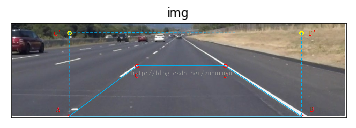

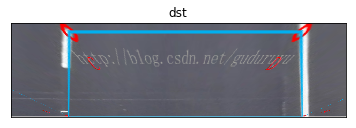

In [3]:
# 实现鸟瞰，将摄像机的视角转换到和道路平行
img = cv2.imread('birdseye.jpg',1)
h, w, ch = img.shape

# (左上角 右上角 左下角 右下角)，坐标表示(w,h)
matSrc = np.float32([[360, 125],[615, 125],[165, 270],[835, 270]])
matDst = np.float32([[165, 30],[835, 30],[165, 270],[835, 270]])

# 得到透视变换矩阵
matSpec=cv2.getPerspectiveTransform(matSrc, matDst)
dst=cv2.warpPerspective(img, matSpec, (w,h))

display1(img, 'img', isGray=False)
display1(dst, 'dst', isGray=False)

## 4 Point getPerspective Transform

Use a perspective transform to obtain a top-down, “birds eye view” of an image.

In [29]:
def order_points(pts):
    # pts is a list of four points specifying the (x, y)
    # coordinates of each point of the rectangle.
    
    # initialzie a list of coordinates that will be ordered
    # such that the first entry in the list is the top-left,
    # the second entry is the top-right, the third is the
    # bottom-right, and the fourth is the bottom-left
    rect = np.zeros((4, 2), dtype = "float32")

    # the top-left point will have the smallest sum, whereas
    # the bottom-right point will have the largest sum
    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    # compute the difference(i.e. x–y) between the points, the
    # top-right point will have the smallest difference,
    # whereas the bottom-left will have the largest difference
    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    # return the ordered coordinates
    return rect

In [34]:
def four_point_transform(image, pts):
    # obtain a consistent order of the points and unpack them
    # individually
    rect = order_points(pts)
    (tl, tr, br, bl) = rect

    # compute the width of the new warped image, which will be the
    # maximum distance between bottom-right and bottom-left
    # x-coordiates or the top-right and top-left x-coordinates
    # widthA = abs(br[0] – bl[0])
    # widthB = abs(tr[0] – tl[0])
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))

    # compute the height of the new warped image, which will be the
    # maximum distance between the top-right and bottom-right
    # y-coordinates or the top-left and bottom-left y-coordinates
    # heightA = abs(tr[1] – br[1])
    # heightB = abs(tl[1] – bl[1])
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))

    # now we have the dimensions of the new image, construct the set
    # of destination points to obtain a "birds eye view"(top-down view)
    # of the image, again specifying points in the top-left, top-right,
    # bottom-right, and bottom-left order
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")

    # compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))

    # return the warped image
    return warped

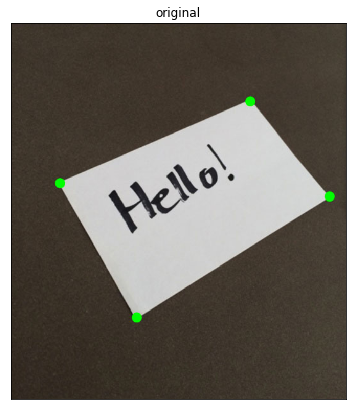

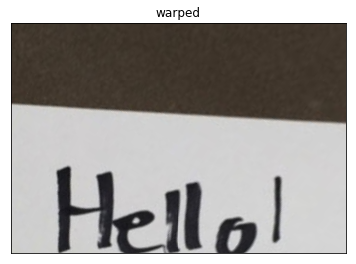

In [36]:
from transform import four_point_transform

# load the image and grab the source coordinates (i.e. the list of
# of (x, y) points)
image = cv2.imread('original.png')

# the pts is the list of four points that contain the ROI of the image
pts = np.array([(73, 239), (356, 117), (475, 265), (187, 443)],
               dtype = "float32")
 
# apply the four point tranform to obtain a "birds eye view" of the image
warped = four_point_transform(image, pts)
 
# show the original and warped images
display1(image, 'original', isGray=False)
display1(warped, 'warped', isGray=False)